In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
# ProfileReport(data).to_file(output_file = "Initial_profiling_report.html")

In [23]:
# TODO: Come up with better dataframes names
dfHighCorr = data[['Loan_ID','LoanAmount', 'Credit_History']].dropna()

In [24]:
# TODO: consider implementing KNN
dfNotHighCorr = data[['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']]
# TODO: think of better alternative
# dfNotHighCorr = dfNotHighCorr.fillna(dfNotHighCorr.median())

# dfNotHighCorr['Gender']=dfNotHighCorr['Gender'].fillna(dfNotHighCorr['Gender'].mode()[0])
# dfNotHighCorr['Loan_Amount_Term']=dfNotHighCorr['Loan_Amount_Term'].fillna(dfNotHighCorr['Loan_Amount_Term'].mode()[0])
# dfNotHighCorr['Dependents']=dfNotHighCorr['Dependents'].fillna(dfNotHighCorr['Dependents'].mode()[0])
# dfNotHighCorr['Self_Employed']=dfNotHighCorr['Self_Employed'].fillna(dfNotHighCorr['Self_Employed'].mode()[0])

dfNotHighCorr = dfNotHighCorr.dropna()

**dfPart**: merging high correlation data frame with non-high correlation data frame

In [25]:
dfPart = pd.merge(dfHighCorr, dfNotHighCorr, on='Loan_ID')

In [26]:
dfRest = data.loc[:, ['Loan_ID','Married','Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_Status']]

In [27]:
df = pd.merge(dfRest, dfPart, on='Loan_ID')

Hot Encoding

In [28]:
# 'Married', 'Education', 'Loan_Status', 'Gender', 'Self_Employed'
df = df.replace(['Yes', 'No'], [0, 1])
df = df.replace(['Graduate', 'Not Graduate'], [0, 1])
df = df.replace(['Y', 'N'], [0, 1])
df = df.replace(['Male', 'Female'], [0, 1])
df = df.replace(['3+'], [3])

In [29]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [30]:
df = pd.get_dummies(df, columns=['Dependents'])
# TODO: reposition Dependents_3 column

one last step is to put target at the end of the data frame

In [31]:
target = df.pop('Loan_Status')
df = df.assign(Loan_Status = target)

In [32]:
#ProfileReport(df).to_file(output_file = "Final_profiling_report.html")

In [33]:
df

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Self_Employed,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Loan_Status
0,LP001003,0,0,4583,1508.0,128.0,1.0,0,1,360.0,1,0,0,0,0,1,0,1
1,LP001005,0,0,3000,0.0,66.0,1.0,0,0,360.0,0,0,1,0,1,0,0,0
2,LP001006,0,1,2583,2358.0,120.0,1.0,0,1,360.0,0,0,1,0,1,0,0,0
3,LP001008,1,0,6000,0.0,141.0,1.0,0,1,360.0,0,0,1,0,1,0,0,0
4,LP001011,0,0,5417,4196.0,267.0,1.0,0,0,360.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,1,0,2900,0.0,71.0,1.0,1,1,360.0,1,0,0,0,1,0,0,0
476,LP002979,0,0,4106,0.0,40.0,1.0,0,1,180.0,1,0,0,1,0,0,0,0
477,LP002983,0,0,8072,240.0,253.0,1.0,0,1,360.0,0,0,1,0,0,1,0,0
478,LP002984,0,0,7583,0.0,187.0,1.0,0,1,360.0,0,0,1,0,0,0,1,0


In [34]:
# TODO: Dropping `Loan_ID` and merge it after? any other ways to map it for later?
df = df.drop('Loan_ID', axis=1)

modeling and resampling

In [35]:
# Allocate inputs
X = df.drop('Loan_Status', axis=1)

# Allocate outputs
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

apply feature selection using extra tree classifier

In [36]:
# TODO: add feature selection logic here

models

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.77      0.96      0.85        93
           1       0.86      0.47      0.61        51

    accuracy                           0.78       144
   macro avg       0.81      0.71      0.73       144
weighted avg       0.80      0.78      0.77       144
 
confusion matrix
 [[89  4]
 [27 24]] 

Accuracy = 0.7847222222222222


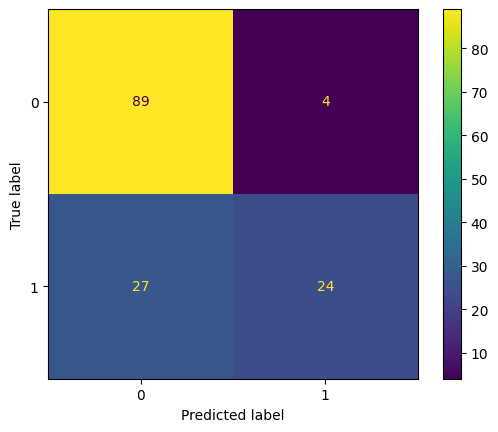

In [38]:
# Logistic Regression
lr = LogisticRegression(random_state = 1, max_iter=600).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_lr),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_lr),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_lr)
      )
cm = confusion_matrix(y_test, y_pred_lr) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = lr.classes_)
display.plot()
plt.show()


Decision Tree Classifier

Random Forest Classifier